In [1]:
import math
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\alice\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [7]:
file_name = "unseen_xgb_reg.pkl"
xgb_model_loaded = pickle.load(open(file_name, "rb"))


In [3]:
# TEST_dataset = pd.read_csv("..\\5_test_dataset\\scripts.csv")
# X_TEST = TEST_dataset.iloc[:, 1:-1].values
# y_TEST = TEST_dataset.iloc[:, -1].values


In [11]:
# TEST_dataset = pd.read_csv("..\\5_test_dataset\\123.csv")
TEST_dataset = pd.read_csv("..\\5_test_dataset\\NEW_scripts.csv")


print(TEST_dataset["KnownMalware"].value_counts())


TEST_dataset.loc[(TEST_dataset.Obfuscation == '0'), 'Obfuscation'] = 0
TEST_dataset.loc[(TEST_dataset.Obfuscation == 'CharFrequency'), 'Obfuscation'] = 1
TEST_dataset.loc[(TEST_dataset.Obfuscation == 'HighVariable'), 'Obfuscation'] = 4
TEST_dataset.loc[(TEST_dataset.Obfuscation == 'dominant'), 'Obfuscation'] = 5
TEST_dataset.loc[(TEST_dataset.Obfuscation == 'HighSymbol'), 'Obfuscation'] = 3
TEST_dataset.loc[(TEST_dataset.Obfuscation == 'HiddenCommands'), 'Obfuscation'] = 2

TEST_dataset.loc[(TEST_dataset.KnownMalware == '0'), 'KnownMalware'] = 0
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'ShellcodeInjector'), 'KnownMalware'] = 19
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'MagicUnicorn'), 'KnownMalware'] = 4
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'PowerShellEmpire'), 'KnownMalware'] = 11
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'SET'), 'KnownMalware'] = 18
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'PowerfunReverse'), 'KnownMalware'] = 16
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'PowerWorm'), 'KnownMalware'] = 14
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'MagicUnicornModified'), 'KnownMalware'] = 5
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'TXTC2'), 'KnownMalware'] = 20
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'VeilStream'), 'KnownMalware'] = 21
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'PowerSploit'), 'KnownMalware'] =12
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'Mimikatz'), 'KnownMalware'] = 6
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'RemoteDLL'), 'KnownMalware'] = 17
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'Mimikittenz'), 'KnownMalware'] = 7
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'Nishang'), 'KnownMalware'] = 8
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'ICMPShell'), 'KnownMalware'] = 2
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'CobaltStrike'), 'KnownMalware'] = 1
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'Invoke'), 'KnownMalware'] = 3
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'PowerfunBind'), 'KnownMalware'] = 15
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'PowerDump'), 'KnownMalware'] = 10
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'PoshC2'), 'KnownMalware'] = 9
TEST_dataset.loc[(TEST_dataset.KnownMalware == 'PowerSploitPowerView'), 'KnownMalware'] = 13

print(TEST_dataset["KnownMalware"].value_counts())

X_TEST = TEST_dataset.iloc[:, 1:-1].values
y_test = TEST_dataset.iloc[:, -1].values


sc = pickle.load(open('unseen_scaler.pkl','rb'))
X_TEST = sc.transform(X_TEST)

feature_name = []
count = 1
for n in TEST_dataset.columns[1:-1]:
    fea = "F"+ str(count) +" : " + n
    feature_name.append(fea)
    count += 1

print(feature_name)


0                       757
Mimikatz                 10
Mimikittenz               8
CobaltStrike              6
Nishang                   6
PowerSploit               6
PowerfunBind              5
PowerDump                 4
PowerfunReverse           4
PowerShellEmpire          4
PowerSploitPowerView      3
Invoke                    3
SET                       3
ICMPShell                 3
PoshC2                    1
Name: KnownMalware, dtype: int64
0     757
6      10
7       8
1       6
8       6
12      6
15      5
10      4
16      4
11      4
13      3
3       3
18      3
2       3
9       1
Name: KnownMalware, dtype: int64
['F1 : OneLiner', 'F2 : VariableExtension', 'F3 : AbnormalSize', 'F4 : Obfuscation', 'F5 : Entropy', 'F6 : PositiveContext', 'F7 : ScriptLogging', 'F8 : FunctionBody', 'F9 : License', 'F10 : Downloader', 'F11 : StartsProcess', 'F12 : ScriptExecution', 'F13 : Crypto', 'F14 : Enumeration', 'F15 : HiddenWindow', 'F16 : CustomWebFields', 'F17 : Persistence', 'F18 : 

In [12]:
y_pred = xgb_model_loaded.predict(X_TEST)
c=""
for n  in y_pred:
   c += str(n)
print(c) 

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011001111000101010110111111111101000011111110101100111011011111011111001011101110111011101011101011111011111111111110010111100011111101011111111001011101110111001101111101011111110110100001010111011110111011100011101101101011111011111100110100111111011110111010000101001111111111101111101011101101011011111011110111111101110100100011011000011011000110111111111111101100110011100111111111111111011001111111111010111


Accuracy: 85.18%
Precision: 100.00%
Recall: 70.46%
F1_Score: 82.67%
Log loss: 5.119964
AUC: 85.23%
[[410   0]
 [122 291]]


C:\Users\alice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


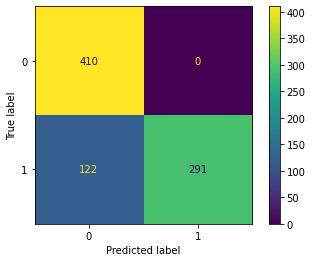

In [13]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

f1 = f1_score(y_test, y_pred)
print("F1_Score: %.2f%%" % (f1 * 100.0))

logloss = log_loss(y_test, y_pred)
print("Log loss: %f" % logloss)

AUC = roc_auc_score(y_test, y_pred)
print("AUC: %.2f%%" % (AUC * 100.0))

print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(xgb_model_loaded, X_TEST, y_test)